In [22]:
import pandas as pd
df = pd.read_csv("medical_examination.csv")
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

| Feature | Variable Type | Variable | Value Type |
| :- | -: | :-: | :-: |
| Age | Objective Feature | age | int (days)  |
|  Height  |  Objective Feature  | height  |  int (cm)|
|  Weight  |  Objective Feature  | weight  |  float (kg)|
|  Gender  |  Objective Feature  | gender  |  categorical code|
|  Systolic blood pressure  |  Examination Feature  | ap_hi  |  int|
|  Diastolic blood pressure  |  Examination Feature  | ap_lo  |  int|
|  Cholesterol  |  Examination Feature  | cholesterol  |  1: normal, 2: above normal, 3: well above normal|
|  Glucose  |  Examination Feature  | gluc  |  1: normal, 2: above normal, 3: well above normal|
|  Smoking  |  Subjective Feature  | smoke  |  binary|
|  Alcohol intake  |  Subjective Feature  | alco  |  binary|
|  Physical activity  |  Subjective Feature  | active  |  binary|
|  Presence or absence of cardiovascular disease  |  Target Variable  | cardio  |  binary|

## Tasks
Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

In [23]:
#Add an overweight column to the data. 
#To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. 
#Use the value 0 for NOT overweight and the value 1 for overweight.
import numpy as np

df['overweight'] = np.where(df['weight'] / (df['height'] / 100) ** 2 > 25, 1,0)

In [24]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)

In [25]:
#Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [14]:
#Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). 
#The dataset should be split by 'Cardio' so there is one chart for each cardio value. 
#The chart should look like examples/Figure_1.png.
df2=pd.melt(df,id_vars=['id'],var_name='metrics', value_name='values')
df2

,id,metrics,values
0,0,age,18393.0
1,1,age,20228.0
2,2,age,18857.0
3,3,age,17623.0
4,4,age,17474.0
...,...,...,...
909995,99993,overweight,1.0
909996,99995,overweight,1.0
909997,99996,overweight,1.0
909998,99998,overweight,1.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_cat = pd.melt(df, id_vars=['cardio'],
                 value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


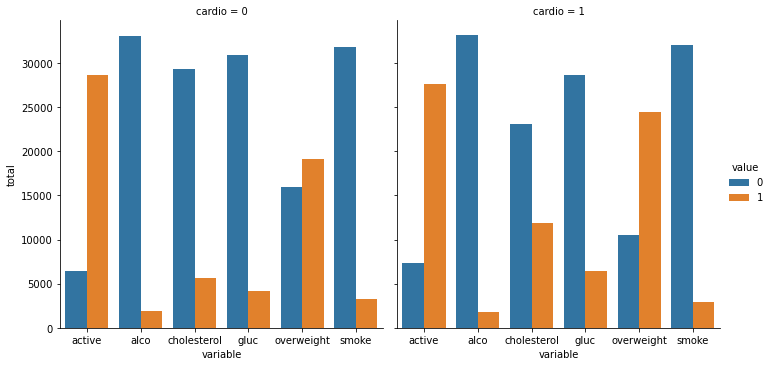

In [28]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
df_cat = df_cat.rename(columns={0: 'total'})

# Draw the catplot with 'sns.catplot()'
graph = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")

In [ ]:
#Clean the data. Filter out the following patient segments that represent incorrect data:

In [30]:
#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
df = df[df['ap_lo'] <= df['ap_hi']]

In [32]:
#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
df = df[df['height'] >= df['height'].quantile(0.025)]

In [34]:
#height is more than the 97.5th percentile
df = df[df['height'] <= df['height'].quantile(0.975)]

In [36]:
#weight is less than the 2.5th percentile
df = df[df['weight'] >= df['weight'].quantile(0.025)]

In [38]:
#weight is more than the 97.5th percentile
df = df[df['weight'] <= df['weight'].quantile(0.975)]

<AxesSubplot:>

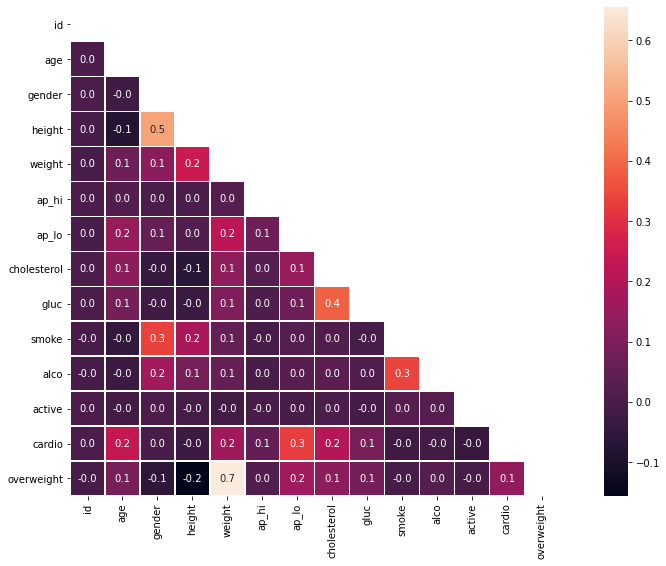

In [41]:
#Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

# Calculate the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")